<a href="https://colab.research.google.com/github/Bensayah/Applied-Deep-Learning/blob/main/Copy_autoGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

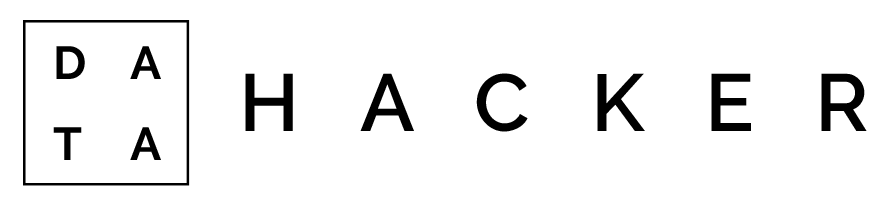
# Computation graphs and Autograd in PyTorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
!pip install autograd

In [ ]:
import autograd.numpy as np
from autograd import grad

In [ ]:
# a named Python function
def g(w):
    return np.tanh(w)

In [ ]:
# how to use the 'tanh' function
w_val = 1.0   # a test input for our 'sin' function
g_val = g(w_val)
print (g_val)

In [ ]:
# how to use 'lambda' to create an "anonymous" function - just a pithier way of writing functions in Python
g = lambda w: np.tanh(w)

In [ ]:
# how to use the 'sin' function written in 'anonymous' format
w_val = 1.0   
g_val = g(w_val)
print (g_val)

In [ ]:
# if we input a float value into our function, it returns a float
print (type(w_val))
print (type(g_val))

# if we input a numpy array, it returns a numpy array
w_val = np.array([1.0])  
g_val = g(w_val)
print (g_val)
print (type(w_val))
print (type(g_val))

In [ ]:
# import statment for gradient calculator
from autograd import grad  

In [ ]:
# create the derivative/gradient function of g --> called dgdw
dgdw = grad(g)

In [ ]:
# evaluate the gradient function at a point
w_val = 1.0
print(dgdw(1.0))

In [ ]:
# compute the second derivative of our input function
dgdw2 = grad(dgdw)
print (dgdw(1.0))

In [ ]:
# import statement for gradient calculator - this method will return both
# derivative and function evaluations (the latter always being computed 'under
# the hood')
from autograd import value_and_grad 

# how to use 'lambda' to create an "anonymous" function - just a pithier way of writing functions in Python
g = lambda w: np.tanh(w)

# create the derivative/gradient function of g --> called dgdw
dgdw = value_and_grad(g)

In [ ]:
# evaluate the gradient function at a point
w_val = 0.0
print (dgdw(0.0))

In [ ]:
# create function / first derivative
g = lambda w: np.tanh(w) 
dgdw = grad(g)

# create first order taylor series approximation - as a Python function
# here w_0 is the center point of the expansion
first_order = lambda w_0,w: g(w_0) + dgdw(w_0)*(w - w_0)

In [ ]:
# create second derivative function
dgdw2 = grad(dgdw)
    
# create second order taylor series approximation - as a Python function
# here w_0 is the center point of the expansion
second_order = lambda w_0,w: g(w_0) + dgdw(w_0)*(w - w_0) + 0.5*dgdw2(w_0)*(w - w_0)**2

In [ ]:
# a simple multi-input function defined in python 
def g(w_1,w_2):
    return np.tanh(w_1*w_2)

In [ ]:
# compute the gradient of our input function
dgdw1 = grad(g,0)
dgdw2 = grad(g,1)

In [ ]:
print(dgdw1(1.0,-2))

In [ ]:
print(dgdw2(1.0,-2.0))

In [ ]:
# construct all partial derivative functions at once
nabla_g = grad(g,(0,1))
print(nabla_g(1.0,-2.0))

In [ ]:
# a simple multi-input function defined in python 
def g(w_1,w_2):
    return np.tanh(w_1*w_2)

In [ ]:
# import function flattening module from autograd
from autograd.misc.flatten import flatten_func

In [ ]:
# flatten an input function g
g, unflatten_func, w = flatten_func(f, input_weights)

In [ ]:
# Python implementation of the function above
z = np.ones((N,1))
def f(input_weights):
    a = input_weights[0]
    b = input_weights[1]
    C = input_weights[2]
    return (((a + np.dot(z.T,b) + np.dot(np.dot(z.T,C),z)))**2)[0][0]

In [ ]:
# Define a function like normal with Python and Numpy
def tanh(x):
   y = np.exp(-x)
   return (1.0 - y) / (1.0 + y)
# Create a function to compute the gradient
grad_tanh = grad(tanh)
# Evaluate the gradient at x = 1.0# how to use 'lambda' to create an "anonymous" function - just a pithier way of writing functions in Python
g = lambda w: np.tanh(w)
print(grad_tanh(1.0))

In [ ]:
# Define a function like normal with Python and Numpy
def h(x,y):
    z = -2*x**2 + y
    return z
# Create a function to compute the gradient
grad_h = grad(h,(0,1))
grad_h0 = grad(h,0)
grad_h1 = grad(h,1)
# Evaluate the gradient at x = 0.0
t=[0.,1.]
print(grad_h0(2.,0.))
print(grad_h0(t[0],t[1]))
print(grad_h1(0.,1.))
print(grad_h(0.,1.))

## Simple example with gradients

Let's now see a simple example of how the derivative is calculated. We will create a scalar tensor `x` and set the `requires_grad` parameter to `True`.

In [ ]:
x = torch.tensor([3.,3.], requires_grad=True)

We will calculate `y` the following way:\
$ y = 3x^2 + 4x + 2$

Now let's see what we get when we replace the `x` with our value `3`:  
$ y = 3(3)^2 + 4(3) + 2 $\
$ y = 3*9 + 12 + 2$\
$ y = 27 + 12 + 2 $\
$ y = 41 $
\
Now comes the part were we take the derivative of `y` with respect to the variable `x`.\
$\frac{dy}{dx} = 2*3x + 4 = 6x + 4$\
If we replace `x` with our value `3`, we get the following:
$6x + 4 = 6(3) + 4 = 18 + 4 = 22$\
So the gradient is equal to $22$\
Let's see how we can do this in code.

In [ ]:
y = 3*x**2 + 4*x + 2
print(y)

In [ ]:
y.backward()
print(x.grad)

In [ ]:
#x.grad.zero_()
z = (y**2).mean()
print(z)

In [ ]:
z.backward()
print(x.grad)

In [ ]:
41**2

Call `y.backward()` to calculate the derivative for that function.

## Is there a way to turn off the gradient calculation ?

The answer is yes, you can turn the gradient calculation anytime.

In [ ]:
x = torch.tensor(3., requires_grad=True)
print(x)

In [ ]:
x = x.requires_grad_(False)
print(x)

In [ ]:
x = x.detach()
print(x)

# Gradient accumulation

The auto gradient calculation does not reset the gradients automatically, therefore we have to reset them after each optimization. If we forget this step they could end up just accumulating.\
This sounds complex, but it is not, it's easy. To reset the gradients for a particular tensor, you can simply pass `x.grad.zero_()` and it will reset the gradient. 

In [ ]:
x = torch.tensor(3., requires_grad=True)

for epoch in range(3):
  y = 3*x**2 + 4*x + 2
  y.backward()

  print(x.grad)
  x.grad.zero_()

## Optimizing parameters with autograd 

Create `x` and `y` data and transform them to be torch tensors using the function `torch.from_numpy()`.

In [ ]:
x = torch.tensor([1.,2.,3.], requires_grad=True)
y = x * 2 + 3
z = y ** 2
print(z)

In [ ]:
out = z.mean()
out.backward()

In [ ]:
print(out)
print(x.grad)

In [ ]:
v = torch.tensor([1.,1.,1.])
z.backward(v)
print(x.grad)

In [ ]:
v = torch.tensor([1.,1.,1.])
z.backward(v)
print(x.grad/len(x))

Create a list for `w` and `b` in which we will save those values.

In [ ]:
x = torch.tensor([1.,2.,3.,4.,5])
y = x * 2 

In [ ]:
w_ = torch.tensor(5., requires_grad=True)
b_ = torch.tensor(1., requires_grad=True)

In [ ]:
for i_value in range(len(x)):
  w = torch.tensor(5., requires_grad=True)
  b = torch.tensor(1., requires_grad=True)

  y_hat = w * x[i_value] + b
  
  error = y_hat - y[i_value]
  loss = error ** 2 

  loss.backward()

  alpha = 0.01
  
  with torch.no_grad():
    w_.data -= alpha * (w.grad/len(x))
    b_.data -= alpha * (b.grad/len(x))

We will iterate and calculate the gradients for each value from the tensor `x_torch`. If we want to calculate the gradient for each number instead of the whole batch or list of numbers, we need to set the `w` and `b` parameters to the same number after calculation. After this step we do the forward pass for that number, and then we calculate the loss for that number and do the backpropagation. Update the `w` and `b` parameters and save them in the list we initialized earlier.

To get the final gradient we need to sum all of the gradients for all the numbers and divide them with the total number of values.

In [ ]:
print(w_)
print(b_)

In [ ]:
w_ = torch.tensor(5., requires_grad=True)
b_ = torch.tensor(1., requires_grad=True)

In [ ]:
y_hat = w * x + b
error = y_hat - y
loss = error ** 2

In [ ]:
loss=loss.mean()
loss.backward()

In [ ]:
w.data -= alpha * w.grad
b.data -= alpha * b.grad

Let's now see how we can do the same thing but just with the whole set of numbers.

In [ ]:
print(w)
print(b)